In [1]:
from astropy.io import fits
import astropy.units as u
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle
plt.rcParams.update({'image.origin': 'lower',
                     'image.interpolation':"nearest"})
import os
from pathlib import Path
import numpy as np

import misc

hlcdir = Path('/groups/douglase/webbpsf-data/CGI/optics/F575'); print(hlcdir)

lambda_m = 575e-9*u.m
D = 2.3633372*u.m

lamD = lambda_m/D
as_per_lamD = lamD * 180/np.pi * 3600

/groups/douglase/webbpsf-data/CGI/optics/F575


# Add pupil scales to the apodizer files.

0.007648340453074434 m / pix (1024, 1024)
0.007648340453074434 m / pix (1024, 1024)


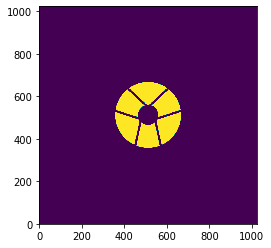

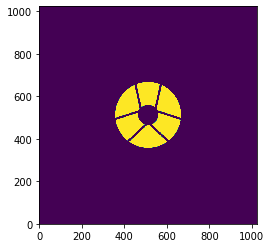

In [2]:
pupil_fnames = [hlcdir/'run461_pupil.fits', hlcdir/'run461_pupil_rotated.fits']
pupil_diam = 2.3633372*u.m
pupil_diam_pix = 309*u.pixel

for fname in pupil_fnames:
    hlc575pup = fits.open(fname, mode='update')

    hlc575pup_data = hlc575pup[0].data

    hlc575pup[0].header['PUPLDIAM'] = pupil_diam.value
    hlc575pup[0].header['PUPLSCAL'] = pupil_diam.value/pupil_diam_pix.value
    hlc575pup[0].header['PIXSCALE'] = pupil_diam.value/pupil_diam_pix.value

    hlc575pup.close()
    
    plt.figure()
    plt.imshow(hlc575pup_data)

    print(pupil_diam/pupil_diam_pix, hlc575pup_data.shape)

# Add pixel scales to the FPM files.

2048 2.68415151111429e-06 5.4625e-07
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.4625e-07theta6.69polp_trans.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.4625e-07theta6.69polp_opd.fits 

2048 2.69984830357695e-06 5.49444444444e-07
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.49444444444e-07theta6.69polp_trans.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.49444444444e-07theta6.69polp_opd.fits 

2048 2.7155450960396e-06 5.52638888889e-07
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.52638888889e-07theta6.69polp_trans.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.52638888889e-07theta6.69polp_opd.fits 

2048 2.71946929415527e-06 5.534375e-07
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.534375e-07theta6.69polp_trans.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.534375e-07theta6.69polp_opd.fits 

2048 2.73124188850226e-06 5.55833333333e-07
/

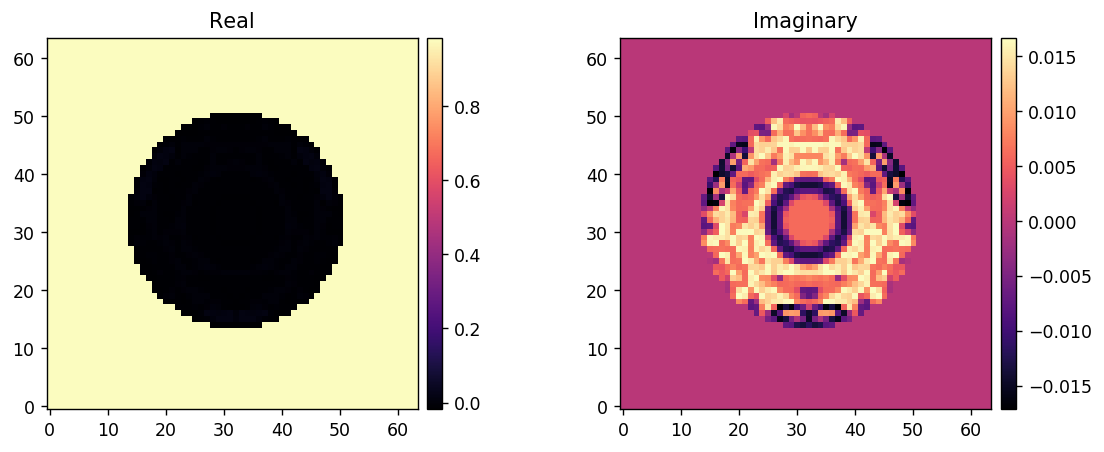

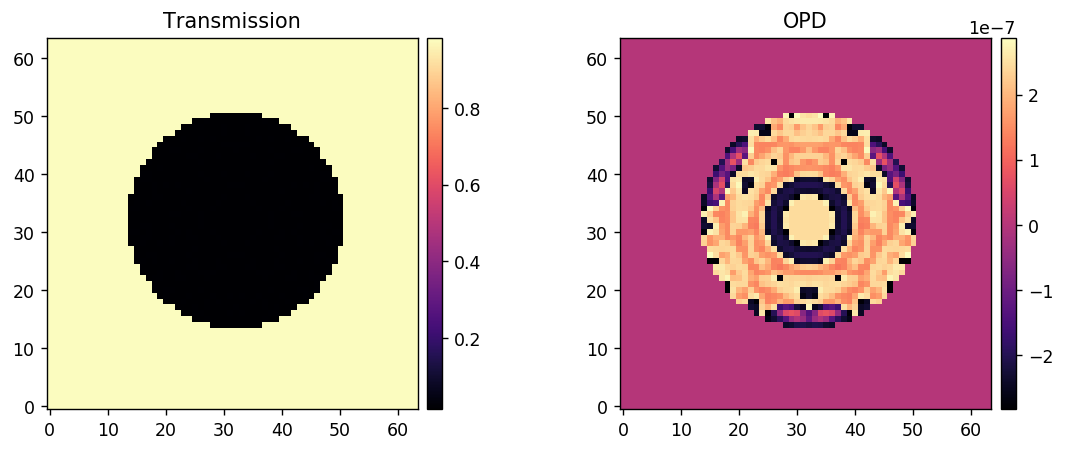

/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.75e-07theta6.69polp_trans.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.75e-07theta6.69polp_opd.fits 

2048 2.84111943574086e-06 5.78194444444e-07
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.78194444444e-07theta6.69polp_trans.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.78194444444e-07theta6.69polp_opd.fits 

2048 2.85681622820351e-06 5.81388888889e-07
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.81388888889e-07theta6.69polp_trans.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.81388888889e-07theta6.69polp_opd.fits 

2048 2.86074042631918e-06 5.821875e-07
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.821875e-07theta6.69polp_trans.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.821875e-07theta6.69polp_opd.fits 

2048 2.87251302066617e-06 5.84583333333e-07
/groups/douglase/webbpsf-data/CGI/optics/

In [15]:
occ_lam = [5.4625e-07, 5.49444444444e-07, 5.52638888889e-07, 5.534375e-07, 5.55833333333e-07, 
           5.59027777778e-07, 5.60625e-07, 5.62222222222e-07, 5.65416666667e-07, 5.678125e-07, 
           5.68611111111e-07, 5.71805555556e-07, 5.75e-07, 5.78194444444e-07, 5.81388888889e-07, 
           5.821875e-07, 5.84583333333e-07, 5.87777777778e-07, 5.89375e-07, 5.90972222222e-07,
           5.94166666667e-07, 5.965625e-07, 5.97361111111e-07, 6.00555555556e-07, 6.0375e-07 ]
occ_lam_strs = ['5.4625e-07', '5.49444444444e-07', '5.52638888889e-07', '5.534375e-07', '5.55833333333e-07', 
                '5.59027777778e-07', '5.60625e-07', '5.62222222222e-07', '5.65416666667e-07', '5.678125e-07', 
                '5.68611111111e-07', '5.71805555556e-07', '5.75e-07', '5.78194444444e-07', '5.81388888889e-07', 
                '5.821875e-07', '5.84583333333e-07', '5.87777777778e-07', '5.89375e-07', '5.90972222222e-07', 
                '5.94166666667e-07', '5.965625e-07', '5.97361111111e-07', '6.00555555556e-07', '6.0375e-07' ]
occ_r_fnames = ['run461_occ_lam' + s + 'theta6.69polp_real.fits' for s in occ_lam_strs ]
occ_i_fnames = ['run461_occ_lam' + s + 'theta6.69polp_imag.fits' for s in occ_lam_strs ]

occ_sampling = 1

for i,fname in enumerate(occ_r_fnames):
    hlc575occ_r = fits.open(str(hlcdir/occ_r_fnames[i]), mode='update')
    hlc575occ_i = fits.open(str(hlcdir/occ_i_fnames[i]), mode='update')
    
    pxscl = hlc575occ_r[0].header['DX']
    
    hlc575occ_r[0].header['PIXELSCL'] = pxscl
    hlc575occ_i[0].header['PIXELSCL'] = pxscl
    
    n = hlc575occ_r[0].data.shape[0]
    fpm_phasor = hlc575occ_r[0].data + 1j*hlc575occ_i[0].data
    fpm_amp = np.abs(fpm_phasor)
    fpm_angle = np.angle(fpm_phasor)
    
    scale = 2. * np.pi / occ_lam[i]
    fpm_opd = fpm_angle/scale
    
#     print(str(hlcdir/occ_r_fnames[i])); 
    print(n, pxscl, occ_lam[i])
    
    if '5.75e-07' in occ_r_fnames[i]:
        misc.myimshow2(hlc575occ_r[0].data, hlc575occ_i[0].data, 'Real', 'Imaginary', n=64)
        misc.myimshow2(fpm_amp, fpm_opd, 'Transmission', 'OPD', n=64)
    
    hlc575occ_r.close()
    hlc575occ_i.close()
    
    wf_fpath = str(hlcdir/occ_i_fnames[i])[:-9] + 'trans.fits'
    wf = np.zeros(shape=(n,n))
    wf[:,:] = fpm_amp
    hdr = fits.Header()
    hdr['PIXELSCL'] = pxscl
    wf_hdu = fits.PrimaryHDU(wf, header=hdr)
    wf_hdu.writeto(wf_fpath, overwrite=True)
    print(wf_fpath)
    
    wf_fpath = str(hlcdir/occ_i_fnames[i])[:-9] + 'opd.fits'
    wf = np.zeros(shape=(n,n))
    wf[:,:] = fpm_angle
    hdr = fits.Header()
    hdr['PIXELSCL'] = pxscl
    wf_hdu = fits.PrimaryHDU(wf, header=hdr)
    wf_hdu.writeto(wf_fpath, overwrite=True)
    print(wf_fpath,'\n')


/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.4625e-07theta6.69polp_real_rotated.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.4625e-07theta6.69polp_imag_rotated.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.49444444444e-07theta6.69polp_real_rotated.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.49444444444e-07theta6.69polp_imag_rotated.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.52638888889e-07theta6.69polp_real_rotated.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.52638888889e-07theta6.69polp_imag_rotated.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.534375e-07theta6.69polp_real_rotated.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.534375e-07theta6.69polp_imag_rotated.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.55833333333e-07theta6.69polp_real_rotated.fits
/groups/douglase/webbpsf-data/CGI/optics/F5

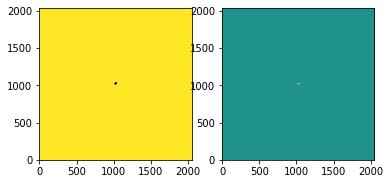

In [4]:
occ_lam_strs = ['5.4625e-07', '5.49444444444e-07', '5.52638888889e-07', '5.534375e-07', '5.55833333333e-07', 
                '5.59027777778e-07', '5.60625e-07', '5.62222222222e-07', '5.65416666667e-07', '5.678125e-07', 
                '5.68611111111e-07', '5.71805555556e-07', '5.75e-07', '5.78194444444e-07', '5.81388888889e-07', 
                '5.821875e-07', '5.84583333333e-07', '5.87777777778e-07', '5.89375e-07', '5.90972222222e-07', 
                '5.94166666667e-07', '5.965625e-07', '5.97361111111e-07', '6.00555555556e-07', '6.0375e-07' ]
occ_r_fnames = ['run461_occ_lam' + s + 'theta6.69polp_real_rotated.fits' for s in occ_lam_strs ]
occ_i_fnames = ['run461_occ_lam' + s + 'theta6.69polp_imag_rotated.fits' for s in occ_lam_strs ]

occ_sampling = 1

for i,fname in enumerate(occ_r_fnames):
    hlc575occ_r = fits.open(str(hlcdir/occ_r_fnames[i]), mode='update')
    hlc575occ_i = fits.open(str(hlcdir/occ_i_fnames[i]), mode='update')

    hlc575occ_r[0].header['PIXELSCL'] = occ_sampling
    hlc575occ_i[0].header['PIXELSCL'] = occ_sampling
    
    if '5.75e-07' in occ_r_fnames[i]:
        print('\n\t',hlc575occ_r[0].header['PIXELSCL'], hlc575occ_r[0].data.shape)
        print('\t',hlc575occ_i[0].header['PIXELSCL'], hlc575occ_i[0].data.shape,'\n')
        plt.subplot(121)
        plt.imshow(hlc575occ_r[0].data)
        plt.subplot(122)
        plt.imshow(hlc575occ_i[0].data)

    print(str(hlcdir/occ_r_fnames[i]))
    print(str(hlcdir/occ_i_fnames[i]))
    
    hlc575occ_r.close()
    hlc575occ_i.close()


# Add pupil scales to the lyot stop files.

5.501618122977347e-05 (1024, 1024)
5.501618122977347e-05 (1024, 1024)


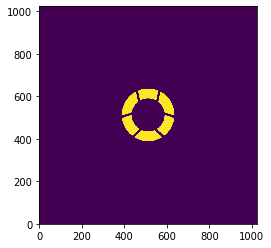

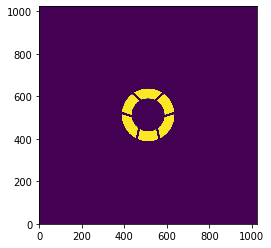

In [2]:
ls_fnames = [hlcdir/'run461_lyot.fits', hlcdir/'run461_lyot_rotated.fits']
ls_sampling = np.array([1.7000e-5, 1.7000e-5]) * 1000/309

for i,fname in enumerate(ls_fnames):
    hlc575ls = fits.open(fname, mode='update')

    hlc575ls[0].header['PIXELSCL'] = ls_sampling[i]

    print(hlc575ls[0].header['PIXELSCL'], hlc575ls[0].data.shape)
    plt.figure()
    plt.imshow(hlc575ls[0].data)
    
    hlc575ls.close()

## Alter the DM fits files.

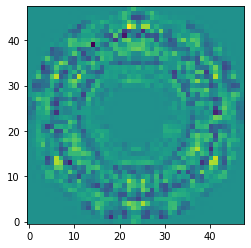

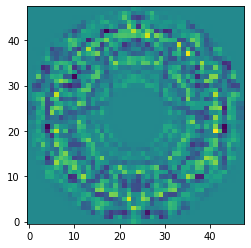

In [6]:
dm_fnames = [hlcdir/'hlc_dm1.fits', hlcdir/'hlc_dm2.fits']
dm_sampling_m = 0.9906e-3*u.m 

for fname in dm_fnames:
    dm = fits.open(fname, mode='update')
    
    dm[0].header['PUPLDIAM'] = dm_sampling_m.value * 48
    dm[0].header['PUPLSCAL'] = dm_sampling_m.value
    dm[0].header['PIXSCALE'] = dm_sampling_m.value

    dm_data = dm[0].data
    dm_hdr = dm[0].header

    dm.close()
    
    plt.figure()
    plt.imshow(dm_data)